In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
!pip3 install colormap 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# from colorspacious import cspace_converter
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [3]:

# Load the CSV data into a pandas DataFrame
data_50000 = pd.read_csv('lcp_ratio.50000.csv')
full_df_50000 = pd.DataFrame(data_50000, columns=[
                       'lcp', 'sa_b','sa', 'hash_b', 'hash', 'bhash_b', 'bhash'])
full_df_50000 = full_df_50000.rename(columns={'lcp': 'Average LCP Length', 'sa': 'SA Query Time', 'hash': 'Hash Query Time', 'bhash': 'B-Hash Query Time',
                                              'sa_b': 'SA Building Time', 'hash_b': 'Hash Building Time', 'bhash_b': 'B-Hash Building Time'})



In [4]:
data_10000 = pd.read_csv('lcp_ratio.10000.csv')
full_df_10000 = pd.DataFrame(data_10000, columns=[
                       'lcp', 'sa_b','sa', 'hash_b', 'hash', 'bhash_b', 'bhash'])
full_df_10000 = full_df_10000.rename(columns={'lcp': 'Average LCP Length', 'sa': 'SA Query Time', 'hash': 'Hash Query Time', 'bhash': 'B-Hash Query Time',
                                              'sa_b': 'SA Building Time', 'hash_b': 'Hash Building Time', 'bhash_b': 'B-Hash Building Time'})



In [5]:
full_df_50000


Average LCP Length  SA Building Time  SA Query Time  Hash Building Time  \
0                1.00              0.44           4.68                0.02   
1                2.31              0.32           6.43                0.01   
2                3.38              0.33           7.68                0.01   
3               11.19              0.38          12.22                0.01   
4               22.26              0.38          13.71                0.01   
5               47.82              0.43          14.96                0.01   

   Hash Query Time  B-Hash Building Time  B-Hash Query Time  
0             4.92                   0.0               9.11  
1             6.60                   0.0              24.99  
2             7.39                   0.0              34.76  
3            11.55                   0.0              67.14  
4            15.14                   0.0              85.26  
5            20.32                   0.0             105.46

In [6]:
full_df_10000

Average LCP Length  SA Building Time  SA Query Time  Hash Building Time  \
0                1.08              0.44           0.89                0.01   
1                3.18              0.45           0.98                0.01   
2                9.70              0.43           1.14                0.01   
3               15.26              0.42           1.18                0.01   
4               62.27              0.45           1.28                0.01   
5              299.88              0.52           1.36                0.01   

   Hash Query Time  B-Hash Building Time  B-Hash Query Time  
0             0.49                   0.0               0.71  
1             0.57                   0.0               1.66  
2             0.68                   0.0               2.89  
3             0.72                   0.0               3.41  
4             1.00                   0.0               5.01  
5             1.48                   0.0               6.75

In [42]:
def RGBtoHex(vals, rgbtype=1):
  """Converts RGB values in a variety of formats to Hex values.

     @param  vals     An RGB/RGBA tuple
     @param  rgbtype  Valid valus are:
                          1 - Inputs are in the range 0 to 1
                        256 - Inputs are in the range 0 to 255

     @return A hex string in the form '#RRGGBB' or '#RRGGBBAA'
"""

  if len(vals)!=3 and len(vals)!=4:
    raise Exception("RGB or RGBA inputs to RGBtoHex must have three or four elements!")
  if rgbtype!=1 and rgbtype!=256:
    raise Exception("rgbtype must be 1 or 256!")

  #Convert from 0-1 RGB/RGBA to 0-255 RGB/RGBA
  if rgbtype==1:
    vals = [255*x for x in vals]

  #Ensure values are rounded integers, convert to hex, and concatenate
  return '#' + ''.join(['{:02X}'.format(int(round(x))) for x in vals])

# pal = ["#ED979D", "#D0BFDB", "#EEE1A8", "#33B065", "#5E81DA"]
# pal2 = ["#E25863", "#B093C3", "#CAAB26", "#33B065", "#5E81DA"]

#google_pal2 = ["#CCAC1C", "#33B065", "#3333FF"]
#google_pal1 = ["#FFD580", "#ceecdf", "#979DED"]
# google_pal2 = ["#fea82f", "#29bf12", "#3f88c5"]
# google_pal1 = ["#FFD580", "#adf6a2", "#c0d8ec"]

cm = plt.cm.get_cmap('tab20c')
# color_map = list(sns.color_palette('tab20'))
# google_pal2 = [RGBtoHex(color_map[0]), RGBtoHex(color_map[2]), RGBtoHex(color_map[4])]
# google_pal1 = [RGBtoHex(color_map[1]), RGBtoHex(color_map[3]), RGBtoHex(color_map[5])]
# sns.color_palette('tab20')
new_pal2 = ["#FF3D00", "#0036FF", "#00FF00"]
new_pal1 = ["#FFF155", "#AEC7E8","#98DF8A"]



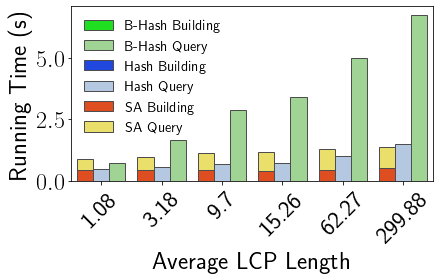

In [43]:
ax = sns.barplot(x='Average LCP Length', y='value', 
                 hue='variable', 
                 hue_order=['SA Query Time', 'Hash Query Time', 'B-Hash Query Time'], 
                 data=pd.melt(full_df_10000, ['Average LCP Length']),palette=new_pal1, edgecolor="0.3")

ax.set_xlabel(r'Average LCP length', fontsize="24.5", font="Lucida Console Bold")


# ax.set_ylabel(r'Running Time ($\times$ 1e8)', fontsize="24.5", font="Lucida Console Bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize="24.5", font="Lucida Console")
ax.tick_params(axis='both', which='major', labelsize=24)
# Set the legend title and location
labels = ["SA Query Time", "Hash Query Time", "B-Hash Query Time"]
order = [0, 1, 2]
ax.legend(edgecolor='None')
ax = sns.barplot(x='Average LCP Length', y='value', hue='variable', 
                 hue_order=['SA Building Time', 'Hash Building Time', 'B-Hash Building Time'], 
                 data=pd.melt(full_df_10000, ['Average LCP Length']), palette=new_pal2, edgecolor="0.3", bottom=[0]*len(full_df_10000["Average LCP Length"]))
ax.set_ylabel(r'Running Time (s)', fontsize="24.5", font="Lucida Console Bold")
handles, labels = plt.gca().get_legend_handles_labels()
# ax.set_ylabel(r'Running Time($s$)', fontsize="14", font="Lucida Console Bold")
# sns.set_palette(new_pal2)
# Change the order of the handles and labels
#handles = [handles[3], handles[0], handles[4],handles[1],handles[5],handles[2]]
#labels = [labels[3][0:-5], labels[0][0:-5], labels[4][0:-5], labels[1][0:-5], labels[5][0:-5], labels[2][0:-5]]
handles = [handles[5],handles[2],handles[4],handles[1],handles[3], handles[0]]
labels = [labels[5][0:-5], labels[2][0:-5], labels[4][0:-5], labels[1][0:-5], labels[3][0:-5], labels[0][0:-5]]
plt.legend(handles, labels, edgecolor='None', fontsize="14.6",framealpha=0)
#legend.get_frame().set_alpha(None)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
# plt.show()
plt.savefig("output/lcp_ratio/" + "lcp_ratio.10000" + ".pdf")

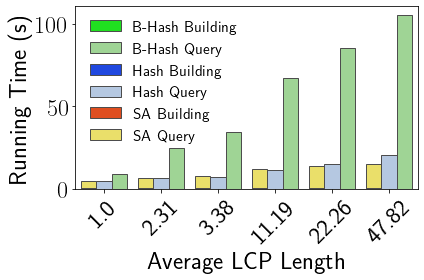

In [44]:
ax = sns.barplot(x='Average LCP Length', y='value', hue='variable', 
                 hue_order=['SA Query Time', 'Hash Query Time', 'B-Hash Query Time'], 
                 data=pd.melt(full_df_50000, ['Average LCP Length']),palette=new_pal1, edgecolor="0.3")
# ax.set_ylim(0, 100)
ax.set_xlabel(r'Average LCP length', fontsize="24.5", font="Lucida Console Bold")
ax.set_ylabel(r'Running Time (s)', fontsize="24.5", font="Lucida Console Bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize="24.5", font="Lucida Console")
# Set the legend title and location
# labels = ["SA Query Time", "Hash Query Time", "B-Hash Query Time"]
labels = ["SA Query", "Hash Query", "B-Hash Query"]
order = [0, 1, 2]
ax.legend(edgecolor='None')
ax = sns.barplot(x='Average LCP Length', y='value', hue='variable', 
                 hue_order=['SA Building Time', 'Hash Building Time', 'B-Hash Building Time'], 
                 data=pd.melt(full_df_50000, ['Average LCP Length']), palette=new_pal2, edgecolor="0.3", bottom=[0]*len(full_df_50000["Average LCP Length"]))
handles, labels = plt.gca().get_legend_handles_labels()
ax.set_ylabel(r'Running Time (s)', fontsize="24.5", font="Lucida Console Bold")
ax.tick_params(axis='both', which='major', labelsize=24)

# Change the order of the handles and labels
#handles = [handles[3], handles[0], handles[4],handles[1],handles[5],handles[2]]
#labels = [labels[3], labels[0], labels[4], labels[1], labels[5], labels[2]]
handles = [handles[5],handles[2],handles[4],handles[1],handles[3], handles[0]]
labels = [labels[5][0:-5], labels[2][0:-5], labels[4][0:-5], labels[1][0:-5], labels[3][0:-5], labels[0][0:-5]]
plt.legend(handles, labels, edgecolor='None', fontsize="15.6",framealpha=0)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
# plt.show()
plt.savefig("output/lcp_ratio/" + "lcp_ratio.50000" + ".pdf")

In [ ]:
google_pal2

['#1F77B4', '#FF7F0E', '#2CA02C']

In [130]:
google_pal1

['#AEC7E8', '#FFBB78', '#98DF8A']

In [131]:
google_pal1


['#AEC7E8', '#FFBB78', '#98DF8A']